# L2 Regularizing NNs

as done in- https://github.com/sergei-bondarenko/machine-learning/blob/master/l2.ipynb which was an answer to [this Stack Exchange question](https://stats.stackexchange.com/questions/287920/regularisation-why-multiply-by-1-2m)
<BR>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

In [2]:
# Helper Functions

# Base NN -- for "make_moons" data
class ANN:
    '''
    Artificial Neural Network class.
    It's uses xavier initialization, ReLU as non-linearity for all layers except
    the last (it uses sigmoid) and a cross-entropy loss function.
    '''

    def __init__(self, dims, lambd=0, reg_type=0):
        '''
        dims -- number of nodes for each layer.
        lambd -- lambda coefficient for L2 regularization.
        reg_type -- regularization type:
            0 -- L2 regularization cost without 1/m factor;
            1 -- with 1/m factor.
        '''
        np.random.seed(2)
        self.params = dict()
        self.L = len(dims) - 1
        self.m = len(Y)
        self.lambd = lambd
        self.reg_type = reg_type
        for i in range(1, self.L+1):
            self.params[f'W{i}'] = np.random.randn(dims[i], dims[i-1]) / np.sqrt(dims[i-1])
            self.params[f'b{i}'] = np.zeros((dims[i],1))

    def forward(self, X, Y=None):
        '''
        Forward propogation.
        '''
        self.X = X
        self.Y = Y
        self.cache = dict()
        self.cache['A0'] = X
        for i in range(1, self.L+1):
            self.cache[f'Z{i}'] = np.dot(self.params[f'W{i}'], self.cache[f'A{i-1}']) + self.params[f'b{i}']
            if i == self.L:
                self.cache[f'A{i}'] = 1 / (1 + np.exp(-self.cache[f'Z{i}']))
            else:
                self.cache[f'A{i}'] = np.maximum(self.cache[f'Z{i}'], 0)
        if Y is not None:
            self.J = -1/self.m * np.sum(np.log(self.cache[f'A{self.L}']) * Y + np.log(1 - self.cache[f'A{self.L}']) * (1 - Y))
            if self.reg_type == 0:
                for i in range(1, self.L+1):
                    self.J += self.lambd/2 * np.sum(self.params[f'W{i}']**2)
            else:
                for i in range(1, self.L+1):
                    self.J += 1/self.m * self.lambd/2 * np.sum(self.params[f'W{i}']**2)

    def backward(self):
        '''
        Backward propogation.
        '''
        for i in reversed(range(1, self.L+1)):
            if i == self.L:
                self.cache[f'dZ{i}'] = self.cache[f'A{i}'] - self.Y
            else:
                self.cache[f'dA{i}'] = np.dot(self.params[f'W{i+1}'].T, self.cache[f'dZ{i+1}'])
                self.cache[f'dZ{i}'] = np.multiply(self.cache[f'dA{i}'], np.int64(self.cache[f'A{i}'] > 0))
            self.cache[f'dW{i}'] = 1/self.m * np.dot(self.cache[f'dZ{i}'], self.cache[f'A{i-1}'].T)
            if self.reg_type == 0:
                self.cache[f'dW{i}'] += self.lambd * self.params[f'W{i}']
            else:
                self.cache[f'dW{i}'] += self.lambd/self.m * self.params[f'W{i}']
            self.cache[f'db{i}'] = 1/self.m * np.sum(self.cache[f'dZ{i}'], axis=1, keepdims=True)

    def predict(self, X):
        '''
        Make predictions.
        '''
        self.forward(X)
        return self.cache[f'A{self.L}'] > 0.5

    def update(self, alpha):
        '''
        Update weigths and biases.
        alpha -- leaning rate.
        '''
        for key,_ in self.params.items():
            self.params[key] -= self.cache[f'd{key}'] * alpha


# Misc Plotting Functions
def plot(X, Y):
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral)
    plt.show()

def plot_decision_boundary(model, X, Y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)
    plt.show()


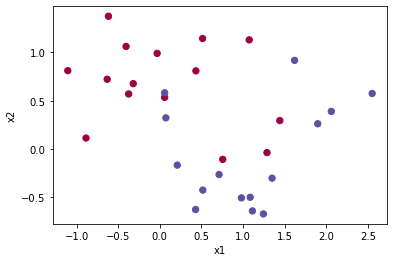

In [3]:
x, y = make_moons(n_samples=30, noise=0.3, random_state=1)
x = x.T

plot(x, y)

In [4]:
# Instantiate a Network -- w/o Regularization

dims = [2, 16, 8, 4, 2, 1]
nn = ANN(dims, lambd=0)

In [5]:
# Train Network -- aim to overfit data

for epoch in range(30000 + 1):
    nn.forward(x, y)
    nn.backward()
    nn.update(0.005)
    if epoch % 3000 == 0:
        print(f"epoch {epoch}: {nn.j}")


Epoch 0: 0.6981566723644628
Epoch 3000: 0.3732285421139766
Epoch 6000: 0.28882061635734957
Epoch 9000: 0.18085991022708764
Epoch 12000: 0.10591036570738555
Epoch 15000: 0.08407509314612477
Epoch 18000: 0.07320760806485767
Epoch 21000: 0.0666640099849121
Epoch 24000: 0.062189393456109694
Epoch 27000: 0.05821394071140755
Epoch 30000: 0.0542698172939229


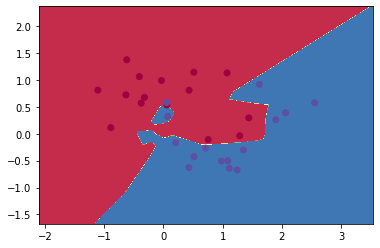

In [6]:
# Plot the Prediction Boundaries
plot_decision_boundary(nn, x, y) #should look pretty overfit


In [7]:
# Recreate NN -- this time with Regularization
dims = [2, 16, 8, 4, 2, 1]
nn = ANN(dims, lambd=0.02, reg_type=0)

for epoch in range(30000 + 1):
    nn.forward(x, y)
    nn.backward()
    nn.update(0.005)

    if epoch % 3000 == 0:
        print(f"Epoch {epoch}: {nn.J}")



Epoch 0: 1.0467261090692976
Epoch 3000: 0.6466230572172408
Epoch 6000: 0.5392781283488379
Epoch 9000: 0.4931559972776928
Epoch 12000: 0.464024386519637
Epoch 15000: 0.43937433897815237
Epoch 18000: 0.41583168265279846
Epoch 21000: 0.39180553647263944
Epoch 24000: 0.36760093498910784
Epoch 27000: 0.3572305442495251
Epoch 30000: 0.3536554973938488


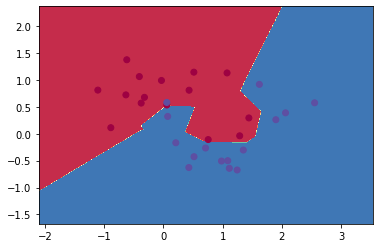

In [8]:
# Plot the Prediction Boundaries
plot_decision_boundary(nn, x, y)

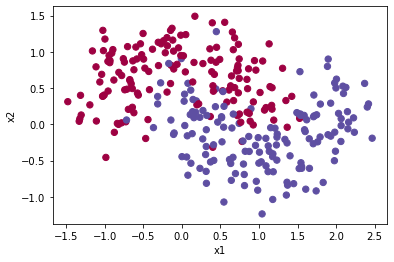

In [11]:
# Add More Data to Mix

x, y = make_moons(n_samples=300, noise=0.3, random_state=1)
x = x.T

plot(x, y)


In [12]:
# Regularized Network -- but with hyperparams of smaller dataset

dims = [2, 16, 8, 4, 2, 1]
nn = ANN(dims, lambd=0.02, reg_type=0)

for epoch in range(30000 + 1):
    nn.forward(x, y)
    nn.backward()
    nn.update(0.005)
    if epoch % 3000 == 0:
        print(f"Epoch {epoch}: {nn.J}")


Epoch 0: 7.329709166469491
Epoch 3000: 2.372836827432976
Epoch 6000: 2.224173010577275
Epoch 9000: 2.1550858661301846
Epoch 12000: 2.1470855791172125
Epoch 15000: 2.1367452215933684
Epoch 18000: 2.122945468132295
Epoch 21000: 2.11710058248308
Epoch 24000: 2.1164144342499274
Epoch 27000: 2.112750588422051
Epoch 30000: 2.119927183658148


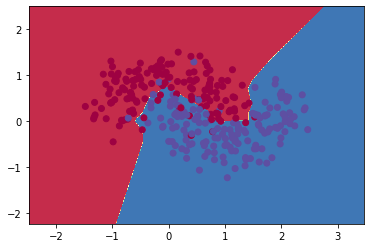

In [13]:
# Plot the Small Data Hyperparams net performance

plot_decision_boundary(nn, x, y)


Epoch 0: 7.015996673435137
Epoch 3000: 1.9815940653447464
Epoch 6000: 1.8455109371449898
Epoch 9000: 1.7442725764529288
Epoch 12000: 1.6715893888473614
Epoch 15000: 1.6218150129385966
Epoch 18000: 1.5810602689617108
Epoch 21000: 1.503493271717416
Epoch 24000: 1.479446757862889
Epoch 27000: 1.379511240119998
Epoch 30000: 1.3751700932937538


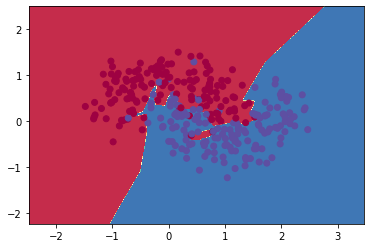

In [14]:
# Decrease Lambda by an Order of Magnitude to compensate for additional data

dims = [2, 16, 8, 4, 2, 1]
nn = ANN(dims, lambd=0.002, reg_type=0) #10x smaller lambda value, not using the scaled reg param (1/m --> the second approach to regularization in this post)
for epoch in range(30000 + 1):
    nn.forward(x, y)
    nn.backward()
    nn.update(0.005)
    if epoch % 3000 == 0:
        print(f"Epoch {epoch}: {nn.J}")

plot_decision_boundary(nn, x, y)


Epoch 0: 0.9886312029518253
Epoch 3000: 0.619977814715984
Epoch 6000: 0.5276541301442352
Epoch 9000: 0.4808506542432139
Epoch 12000: 0.44875831040356934
Epoch 15000: 0.41763004718203245
Epoch 18000: 0.39101051254441116
Epoch 21000: 0.3547399670956862
Epoch 24000: 0.3247511245074816
Epoch 27000: 0.3174094996697229
Epoch 30000: 0.31417827157218847


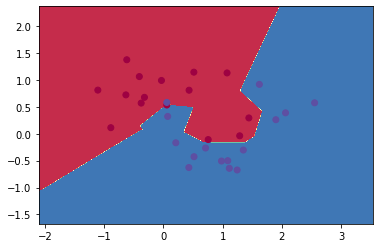

In [15]:
# Constrastive Point -- using `1/m` for scaling doesnt require the manual tuning of reg params

x, y = make_moons(n_samples=30, noise=0.3, random_state=1)
x = x.T
dims = [2, 16, 8, 4, 2, 1]
nn = ANN(dims, lambd=0.5, reg_type=1) #reg_type=1 --> the 1/m regularizer
for epoch in range(30000 + 1):
    nn.forward(x, y)
    nn.backward()
    nn.update(0.005)
    if epoch % 3000 == 0:
        print(f"Epoch {epoch}: {nn.J}")

plot_decision_boundary(nn, x, y)

Epoch 0: 7.271614260352018
Epoch 3000: 2.3309384199376333
Epoch 6000: 2.1600367172307466
Epoch 9000: 2.108613529404368
Epoch 12000: 2.0645557031110138
Epoch 15000: 2.0520272574885507
Epoch 18000: 2.054333454927932
Epoch 21000: 2.052566357074114
Epoch 24000: 2.0330747484994616
Epoch 27000: 2.0341966825971767
Epoch 30000: 2.057187998145657


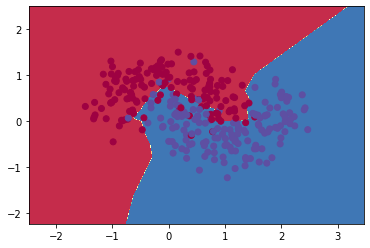

In [16]:
# Adding more data does not require any scaling of lambda!

x, y = make_moons(n_samples=300, noise=0.3, random_state=1)
x = x.T
dims = [2, 16, 8, 4, 2, 1]
nn = ANN(dims, lambd=0.5, reg_type=1) #same lambda as above cell, comparable performance despite way more data and no manual reg!

for epoch in range(30000 + 1):
    nn.forward(x, y)
    nn.backward()
    nn.update(0.005)
    if epoch % 3000 == 0:
        print(f"Epoch {epoch}: {nn.J}")

plot_decision_boundary(nn, x, y)